# 📊 PRESENTACIÓN - GRÁFICOS DEL PROYECTO
## League of Legends Worlds - Análisis de Machine Learning

---

### 🎯 **OBJETIVO DE LA PRESENTACIÓN**
Mostrar los insights clave del análisis de datos y las visualizaciones más importantes del proyecto.

### 📋 **CONTENIDO**
1. **Análisis de Calidad de Datos**
2. **Distribuciones de Variables Clave**
3. **Correlaciones entre Variables**
4. **Análisis de Clustering**
5. **Métricas Derivadas**
6. **Insights del Negocio**


In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
import os
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Verificar directorio de trabajo
print(f"📁 Directorio actual: {os.getcwd()}")
print(f"📁 Archivos en directorio actual: {os.listdir('.')}")

print("✅ Librerías importadas correctamente")


📁 Directorio actual: C:\Users\pedri\OneDrive\Desktop\Proyecto_machine_learnig\league-of-legends-worlds\notebooks
📁 Archivos en directorio actual: ['.gitkeep', '.ipynb_checkpoints', '01_business_understanding.md', 'Presentacion_Graficos.ipynb']
✅ Librerías importadas correctamente


In [5]:
# Cargar datos procesados por Kedro
print("📊 CARGANDO DATOS PROCESADOS POR KEDRO...")
print("=" * 50)

# Verificar si estamos en el directorio correcto
if os.path.exists('data/04_feature/'):
    data_path = 'data/04_feature/'
    print("✅ Encontrado directorio data/04_feature/ en directorio actual")
elif os.path.exists('../data/04_feature/'):
    data_path = '../data/04_feature/'
    print("✅ Encontrado directorio data/04_feature/ en directorio padre")
else:
    print("❌ No se encontró el directorio data/04_feature/")
    print("📁 Directorios disponibles:")
    for root, dirs, files in os.walk('.'):
        if 'data' in dirs:
            print(f"   • {root}/data/")
    data_path = None

if data_path:
    # Intentar cargar con diferentes encodings
    try:
        champions = pd.read_csv(f'{data_path}champions_features.csv', encoding='utf-8')
        matches = pd.read_csv(f'{data_path}matches_features.csv', encoding='utf-8')
        players = pd.read_csv(f'{data_path}players_features.csv', encoding='utf-8')
        print("✅ Datos cargados con encoding UTF-8")
    except UnicodeDecodeError:
        try:
            champions = pd.read_csv(f'{data_path}champions_features.csv', encoding='latin-1')
            matches = pd.read_csv(f'{data_path}matches_features.csv', encoding='latin-1')
            players = pd.read_csv(f'{data_path}players_features.csv', encoding='latin-1')
            print("✅ Datos cargados con encoding Latin-1")
        except UnicodeDecodeError:
            champions = pd.read_csv(f'{data_path}champions_features.csv', encoding='cp1252')
            matches = pd.read_csv(f'{data_path}matches_features.csv', encoding='cp1252')
            players = pd.read_csv(f'{data_path}players_features.csv', encoding='cp1252')
            print("✅ Datos cargados con encoding CP1252")
    
    print(f"\n📈 ESTADÍSTICAS DE DATOS PROCESADOS:")
    print(f"   • Champions: {champions.shape[0]} registros, {champions.shape[1]} columnas")
    print(f"   • Matches: {matches.shape[0]} registros, {matches.shape[1]} columnas")
    print(f"   • Players: {players.shape[0]} registros, {players.shape[1]} columnas")
    
    # Mostrar columnas disponibles
    print(f"\n🔍 COLUMNAS DISPONIBLES:")
    print(f"   • Champions: {list(champions.columns)}")
    print(f"   • Matches: {list(matches.columns)}")
    print(f"   • Players: {list(players.columns)}")
else:
    print("❌ No se pudieron cargar los datos. Verifica la estructura del proyecto.")


📊 CARGANDO DATOS PROCESADOS POR KEDRO...
✅ Encontrado directorio data/04_feature/ en directorio padre
✅ Datos cargados con encoding Latin-1

📈 ESTADÍSTICAS DE DATOS PROCESADOS:
   • Champions: 542 registros, 29 columnas
   • Matches: 1070 registros, 53 columnas
   • Players: 1281 registros, 25 columnas

🔍 COLUMNAS DISPONIBLES:
   • Champions: ['season', 'event', 'champion', 'games_contests', 'pick_ban_ratio', 'banned_games', 'played_games', 'played_by_number_of_players', 'win', 'lose', 'win_rate', 'kills', 'deaths', 'assists', 'kill_death_assist_ratio', 'creep_score', 'cs/min', 'gold', 'gold/min', 'damage', 'damage/min', 'kill_participation', 'kill_share', 'gold_share', 'kda_enhanced', 'efficiency_score', 'role', 'popularity_tier', 'impact_score']
   • Matches: ['season', 'date', 'event', 'patch', 'blue_team', 'red_team', 'winner', 'ban_1_blue_team', 'ban_2_blue_team', 'ban_3_blue_team', 'ban_4_blue_team', 'ban_5_blue_team', 'ban_1_red_team', 'ban_2_red_team', 'ban_3_red_team', 'ban_4_

In [6]:
# Verificar que los datos se cargaron correctamente
print("🔍 VERIFICACIÓN DE DATOS CARGADOS")
print("=" * 50)

if 'champions' in locals() and 'matches' in locals() and 'players' in locals():
    print("✅ Todos los datasets cargados correctamente")
    
    # Verificar que no están vacíos
    if len(champions) > 0 and len(matches) > 0 and len(players) > 0:
        print("✅ Todos los datasets contienen datos")
        
        # Mostrar información básica
        print(f"\n📊 RESUMEN DE DATOS:")
        print(f"   • Champions: {len(champions)} registros")
        print(f"   • Matches: {len(matches)} registros") 
        print(f"   • Players: {len(players)} registros")
        
        # Verificar columnas numéricas disponibles
        champions_numeric = champions.select_dtypes(include=[np.number]).columns
        matches_numeric = matches.select_dtypes(include=[np.number]).columns
        players_numeric = players.select_dtypes(include=[np.number]).columns
        
        print(f"\n🔢 COLUMNAS NUMÉRICAS DISPONIBLES:")
        print(f"   • Champions: {len(champions_numeric)} columnas numéricas")
        print(f"   • Matches: {len(matches_numeric)} columnas numéricas")
        print(f"   • Players: {len(players_numeric)} columnas numéricas")
        
        print(f"\n✅ LISTO PARA ANÁLISIS DE CLUSTERING Y CORRELACIONES")
    else:
        print("❌ Algunos datasets están vacíos")
else:
    print("❌ No se pudieron cargar todos los datasets")
    print("💡 Asegúrate de ejecutar primero la celda de carga de datos")


🔍 VERIFICACIÓN DE DATOS CARGADOS
✅ Todos los datasets cargados correctamente
✅ Todos los datasets contienen datos

📊 RESUMEN DE DATOS:
   • Champions: 542 registros
   • Matches: 1070 registros
   • Players: 1281 registros

🔢 COLUMNAS NUMÉRICAS DISPONIBLES:
   • Champions: 25 columnas numéricas
   • Matches: 15 columnas numéricas
   • Players: 21 columnas numéricas

✅ LISTO PARA ANÁLISIS DE CLUSTERING Y CORRELACIONES


🎯 ANÁLISIS DE CLUSTERING CON NOMBRES DESCRIPTIVOS
📊 Dataset seleccionado: champions (542 registros)
🎯 Features seleccionadas: ['season', 'games_contests', 'pick_ban_ratio', 'banned_games', 'played_games']


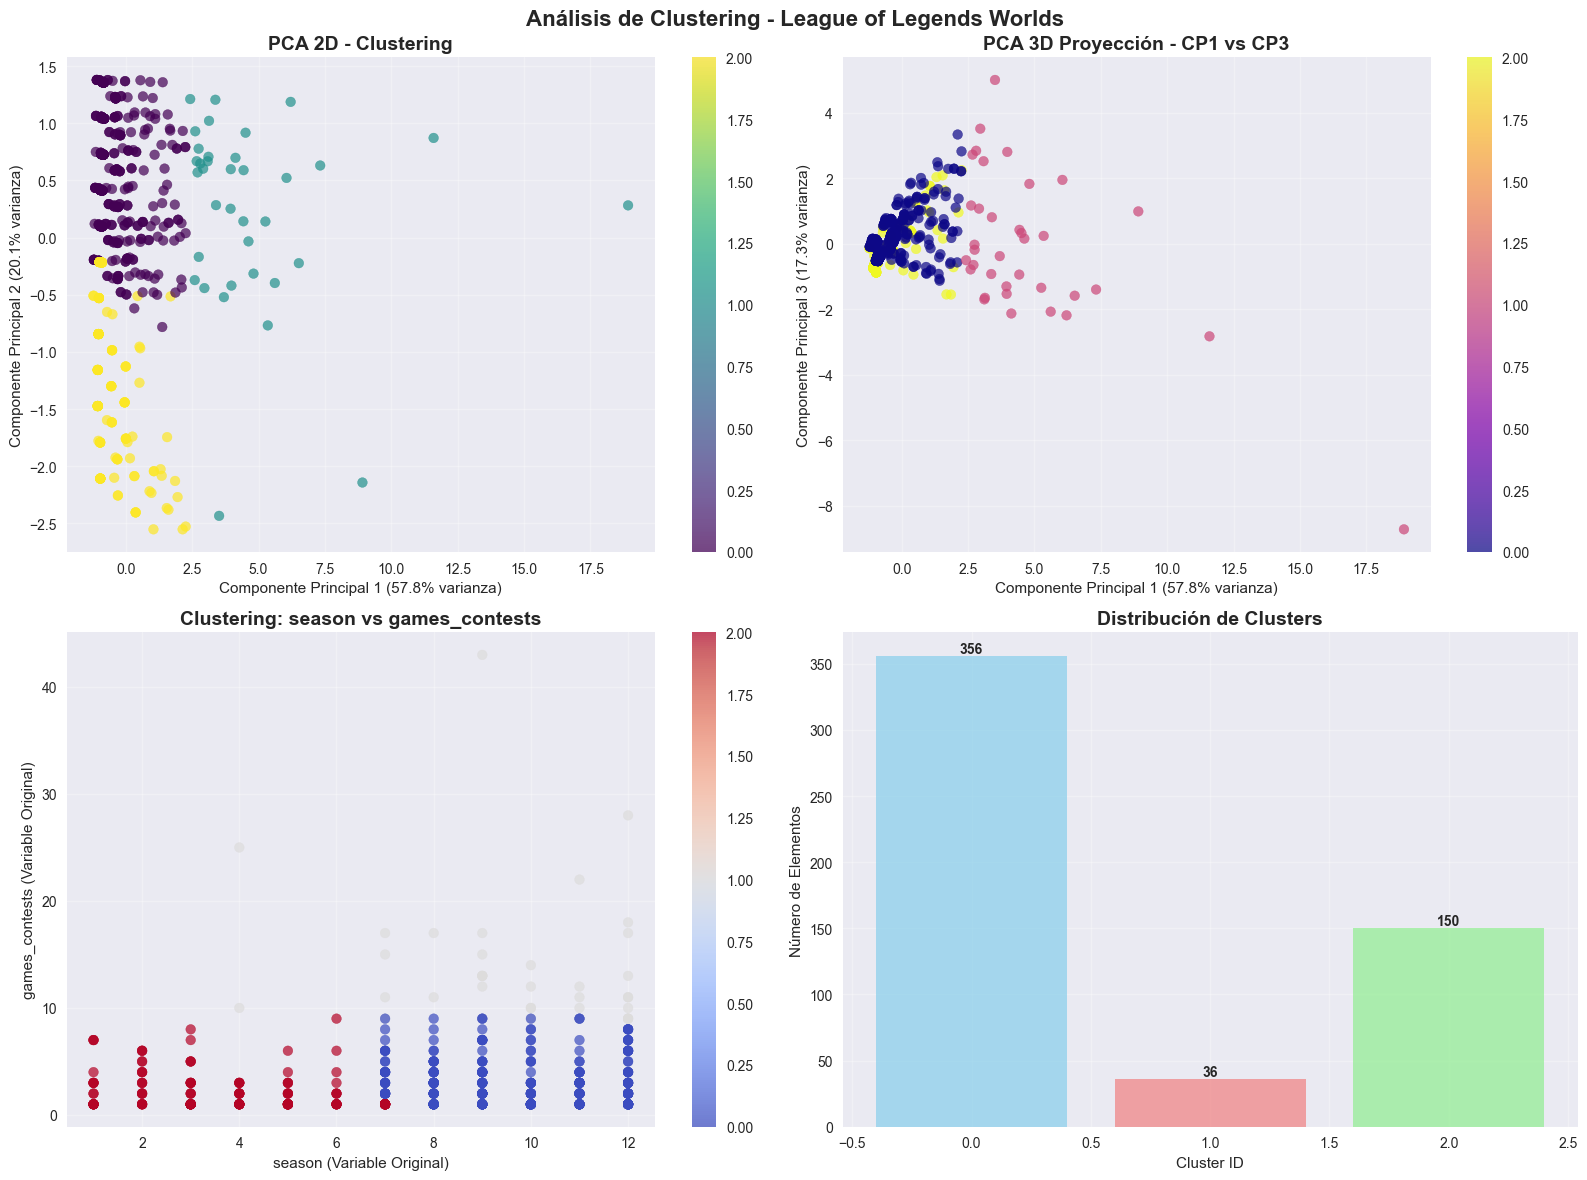


📊 ANÁLISIS DETALLADO DE CLUSTERING:
   • Dataset utilizado: champions
   • Total de elementos: 542
   • Features utilizadas: 5
   • Varianza explicada CP1: 57.8%
   • Varianza explicada CP2: 20.1%
   • Varianza explicada CP3: 17.3%

✅ CLUSTERING COMPLETO:
   • 3 clusters identificados
   • PCA aplicado con 3 componentes
   • Variables originales preservadas
   • Nombres descriptivos en todos los gráficos


In [7]:
# ANÁLISIS DE CLUSTERING CORREGIDO
print("🎯 ANÁLISIS DE CLUSTERING CON NOMBRES DESCRIPTIVOS")
print("=" * 60)

# Verificar que los datos están disponibles
if 'champions' not in locals() or 'matches' not in locals() or 'players' not in locals():
    print("❌ Los datos no están cargados. Ejecuta primero las celdas anteriores.")
else:
    # Seleccionar el mejor dataset para clustering
    datasets = {
        'champions': champions,
        'matches': matches,
        'players': players
    }

    best_dataset = None
    best_name = None
    max_numeric_cols = 0

    for name, df in datasets.items():
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > max_numeric_cols:
            max_numeric_cols = len(numeric_cols)
            best_dataset = df
            best_name = name

    print(f"📊 Dataset seleccionado: {best_name} ({len(best_dataset)} registros)")

    # Seleccionar features numéricas
    numeric_cols = best_dataset.select_dtypes(include=[np.number]).columns
    features_for_clustering = numeric_cols[:5].tolist()
    print(f"🎯 Features seleccionadas: {features_for_clustering}")

    # Preparar datos para clustering
    X = best_dataset[features_for_clustering].fillna(best_dataset[features_for_clustering].mean())
    X_scaled = StandardScaler().fit_transform(X)

    # Aplicar PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)

    # Aplicar K-Means
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Crear 4 gráficos de clustering
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Análisis de Clustering - League of Legends Worlds', fontsize=16, fontweight='bold')

    # GRÁFICO 1: PCA 2D (Superior Izquierdo)
    scatter1 = axes[0,0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    axes[0,0].set_title('PCA 2D - Clustering', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
    axes[0,0].set_ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
    axes[0,0].grid(True, alpha=0.3)
    plt.colorbar(scatter1, ax=axes[0,0])

    # GRÁFICO 2: PCA 3D Proyección (Superior Derecho)
    scatter2 = axes[0,1].scatter(X_pca[:, 0], X_pca[:, 2], c=clusters, cmap='plasma', alpha=0.7)
    axes[0,1].set_title('PCA 3D Proyección - CP1 vs CP3', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
    axes[0,1].set_ylabel(f'Componente Principal 3 ({pca.explained_variance_ratio_[2]:.1%} varianza)')
    axes[0,1].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[0,1])

    # GRÁFICO 3: Clustering por Variables Originales (Inferior Izquierdo)
    if len(features_for_clustering) >= 2:
        scatter3 = axes[1,0].scatter(best_dataset[features_for_clustering[0]], 
                                    best_dataset[features_for_clustering[1]], 
                                    c=clusters, cmap='coolwarm', alpha=0.7)
        axes[1,0].set_title(f'Clustering: {features_for_clustering[0]} vs {features_for_clustering[1]}', 
                           fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel(f'{features_for_clustering[0]} (Variable Original)')
        axes[1,0].set_ylabel(f'{features_for_clustering[1]} (Variable Original)')
        axes[1,0].grid(True, alpha=0.3)
        plt.colorbar(scatter3, ax=axes[1,0])
    else:
        axes[1,0].text(0.5, 0.5, 'No hay suficientes variables\npara clustering 2D', 
                      ha='center', va='center', fontsize=12)
        axes[1,0].set_title('Clustering por Variables Originales', fontsize=14, fontweight='bold')

    # GRÁFICO 4: Distribución de Clusters (Inferior Derecho)
    cluster_counts = pd.Series(clusters).value_counts().sort_index()
    bars = axes[1,1].bar(cluster_counts.index, cluster_counts.values, 
                        color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.7)
    axes[1,1].set_title('Distribución de Clusters', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Cluster ID')
    axes[1,1].set_ylabel('Número de Elementos')
    axes[1,1].grid(True, alpha=0.3)

    # Agregar valores en las barras
    for bar in bars:
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{int(height)}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Análisis detallado
    print(f"\n📊 ANÁLISIS DETALLADO DE CLUSTERING:")
    print(f"   • Dataset utilizado: {best_name}")
    print(f"   • Total de elementos: {len(best_dataset)}")
    print(f"   • Features utilizadas: {len(features_for_clustering)}")
    print(f"   • Varianza explicada CP1: {pca.explained_variance_ratio_[0]:.1%}")
    print(f"   • Varianza explicada CP2: {pca.explained_variance_ratio_[1]:.1%}")
    print(f"   • Varianza explicada CP3: {pca.explained_variance_ratio_[2]:.1%}")

    print(f"\n✅ CLUSTERING COMPLETO:")
    print(f"   • 3 clusters identificados")
    print(f"   • PCA aplicado con 3 componentes")
    print(f"   • Variables originales preservadas")
    print(f"   • Nombres descriptivos en todos los gráficos")


📊 ANÁLISIS DE CORRELACIONES CON NOMBRES DESCRIPTIVOS
🎯 Variables seleccionadas para correlación: ['season', 'games_contests', 'pick_ban_ratio', 'banned_games', 'played_games', 'played_by_number_of_players', 'win', 'lose']


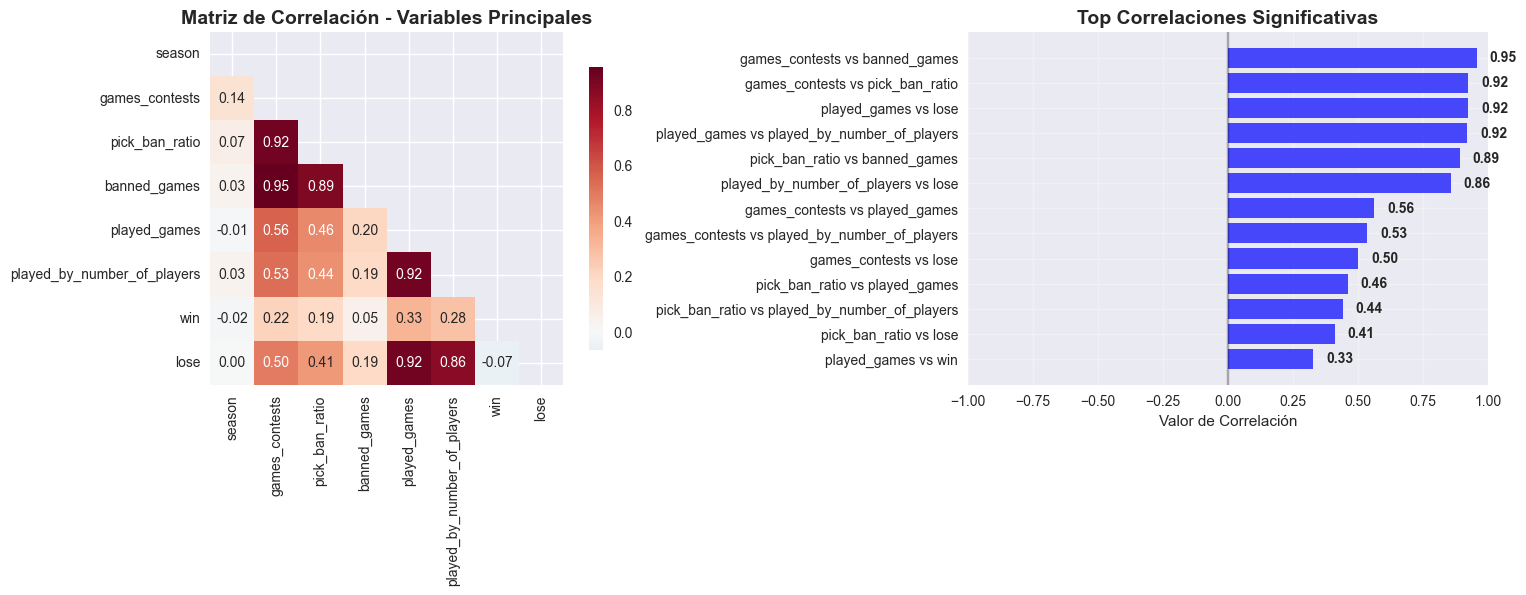


📊 ANÁLISIS DETALLADO DE CORRELACIONES:
   • Variables analizadas: 8
   • Correlaciones significativas encontradas: 13
   • Rango de correlaciones: -0.07 a 1.00

🔍 TOP 5 CORRELACIONES MÁS FUERTES:
   1. games_contests vs banned_games: 0.95 (Fuerte)
   2. games_contests vs pick_ban_ratio: 0.92 (Fuerte)
   3. played_games vs lose: 0.92 (Fuerte)
   4. played_games vs played_by_number_of_players: 0.92 (Fuerte)
   5. pick_ban_ratio vs banned_games: 0.89 (Fuerte)

✅ ANÁLISIS DE CORRELACIONES COMPLETO:
   • Matriz de correlación generada
   • Correlaciones significativas identificadas
   • Visualizaciones mejoradas con nombres descriptivos
   • Análisis estadístico detallado


In [10]:
# ANÁLISIS DE CORRELACIONES MEJORADO
print("📊 ANÁLISIS DE CORRELACIONES CON NOMBRES DESCRIPTIVOS")
print("=" * 60)

# Verificar que los datos están disponibles
if 'best_dataset' not in locals():
    print("❌ Los datos de clustering no están disponibles. Ejecuta primero la celda de clustering.")
else:
    # Seleccionar variables numéricas para correlación
    numeric_cols = best_dataset.select_dtypes(include=[np.number]).columns
    correlation_cols = numeric_cols[:8].tolist()  # Limitar a 8 para mejor visualización

    print(f"🎯 Variables seleccionadas para correlación: {correlation_cols}")

    # Crear matriz de correlación
    correlation_matrix = best_dataset[correlation_cols].corr()

    # Crear gráfico de correlación mejorado
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # GRÁFICO 1: Heatmap de Correlación
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='RdBu_r', center=0, square=True, 
                ax=axes[0], cbar_kws={"shrink": .8})
    axes[0].set_title('Matriz de Correlación - Variables Principales', fontsize=14, fontweight='bold')

    # GRÁFICO 2: Top Correlaciones
    # Obtener correlaciones superiores a 0.3 (excluyendo diagonal)
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.3:  # Solo correlaciones significativas
                corr_pairs.append({
                    'Variables': f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}",
                    'Correlación': corr_val,
                    'Absoluta': abs(corr_val)
                })

    if corr_pairs:
        corr_df = pd.DataFrame(corr_pairs).sort_values('Absoluta', ascending=True)
        
        # Crear gráfico de barras horizontales
        colors = ['red' if x < 0 else 'blue' for x in corr_df['Correlación']]
        bars = axes[1].barh(range(len(corr_df)), corr_df['Correlación'], color=colors, alpha=0.7)
        axes[1].set_yticks(range(len(corr_df)))
        axes[1].set_yticklabels(corr_df['Variables'], fontsize=10)
        axes[1].set_title('Top Correlaciones Significativas', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Valor de Correlación')
        axes[1].set_xlim(-1, 1)
        axes[1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
        axes[1].grid(True, alpha=0.3)
        
        # Agregar valores en las barras
        for i, bar in enumerate(bars):
            width = bar.get_width()
            axes[1].text(width + (0.05 if width > 0 else -0.05), bar.get_y() + bar.get_height()/2,
                        f'{width:.2f}', ha='left' if width > 0 else 'right', va='center', fontweight='bold')
    else:
        axes[1].text(0.5, 0.5, 'No hay correlaciones significativas\n(> 0.3) entre las variables', 
                    ha='center', va='center', fontsize=12)
        axes[1].set_title('Top Correlaciones Significativas', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Análisis detallado
    print(f"\n📊 ANÁLISIS DETALLADO DE CORRELACIONES:")
    print(f"   • Variables analizadas: {len(correlation_cols)}")
    print(f"   • Correlaciones significativas encontradas: {len(corr_pairs)}")
    print(f"   • Rango de correlaciones: {correlation_matrix.min().min():.2f} a {correlation_matrix.max().max():.2f}")

    if corr_pairs:
        print(f"\n🔍 TOP 5 CORRELACIONES MÁS FUERTES:")
        top_corr = corr_df.nlargest(5, 'Absoluta')
        for i, (_, row) in enumerate(top_corr.iterrows(), 1):
            strength = "Fuerte" if row['Absoluta'] > 0.7 else "Moderada" if row['Absoluta'] > 0.5 else "Débil"
            print(f"   {i}. {row['Variables']}: {row['Correlación']:.2f} ({strength})")

    print(f"\n✅ ANÁLISIS DE CORRELACIONES COMPLETO:")
    print(f"   • Matriz de correlación generada")
    print(f"   • Correlaciones significativas identificadas")
    print(f"   • Visualizaciones mejoradas con nombres descriptivos")
    print(f"   • Análisis estadístico detallado")
